In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = pd.read_csv("Downloads\\AirPassengers.csv")

In [13]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [16]:
df.isnull().any()

Month          False
#Passengers    False
dtype: bool

In [18]:
df.Month = pd.to_datetime(df.Month)

In [20]:
df.Month.head()

0   1949-01-01
1   1949-02-01
2   1949-03-01
3   1949-04-01
4   1949-05-01
Name: Month, dtype: datetime64[ns]

In [22]:
df.set_index("Month",inplace = True)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

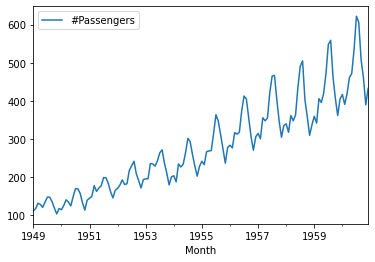

In [23]:
df.plot()

In [28]:
df.columns = ['Passengers']
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [24]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [29]:
test_result=adfuller(df['Passengers'])

In [30]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Passengers):
    result=adfuller(Passengers)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [31]:
adfuller_test(df['Passengers'])

ADF Test Statistic : 0.8273719403667955
p-value : 0.9920653980124213
#Lags Used : 13
Number of Observations Used : 130
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [32]:
df['Passengers First Difference'] = df['Passengers'] - df['Passengers'].shift(1)

In [33]:
df.head()

,Passengers,Passengers First Difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [36]:
df['Seasonal First Difference']=df['Passengers']-df['Passengers'].shift(12)

In [37]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.3804878212163527
p-value : 0.01164229968880499
#Lags Used : 1
Number of Observations Used : 130
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

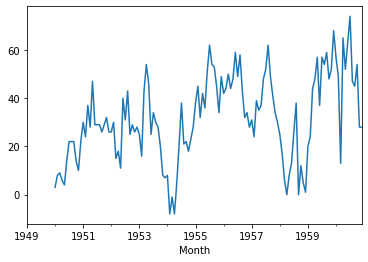

In [38]:
df['Seasonal First Difference'].plot()

# Auto Regressive Model
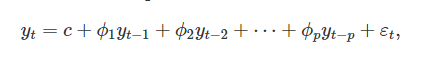

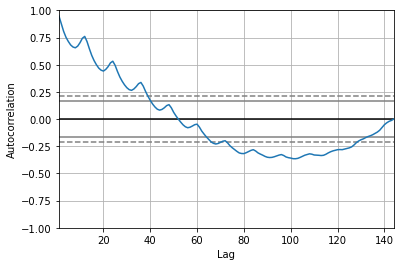

In [41]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Passengers'])
plt.show()

# Final Thoughts on Autocorrelation and Partial Autocorrelation
Identification of an AR model is often best done with the PACF.
For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
Identification of an MA model is often best done with the ACF rather than the PACF.

For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

p,d,q p AR model lags d differencing q MA lags

In [42]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [44]:
import statsmodels.api as sm

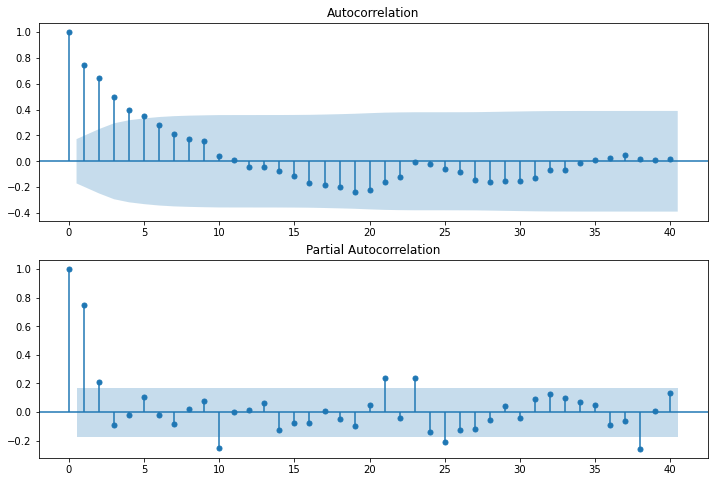

In [45]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [46]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [47]:
model=ARIMA(df['-'],order=(1,1,1))
model_fit=model.fit()

C:\Users\arkarmak\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\arkarmak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency

In [48]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Passengers   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -697.094
Method:                       css-mle   S.D. of innovations             31.342
Date:                Sat, 26 Mar 2022   AIC                           1402.187
Time:                        22:11:11   BIC                           1414.039
Sample:                    02-01-1949   HQIC                          1407.003
                         - 12-01-1960                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.6122      0.228     11.449      0.000       2.165       3.059
ar.L1.D.Passengers     0.7397      0.058     12.772      0.000       0.626       0.853
ma.L1.D.Passengers    -1.0000      0.019    -53.384      0.000      -1.037      -0.963
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3518           +0.0000j            1.3518            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Month'>

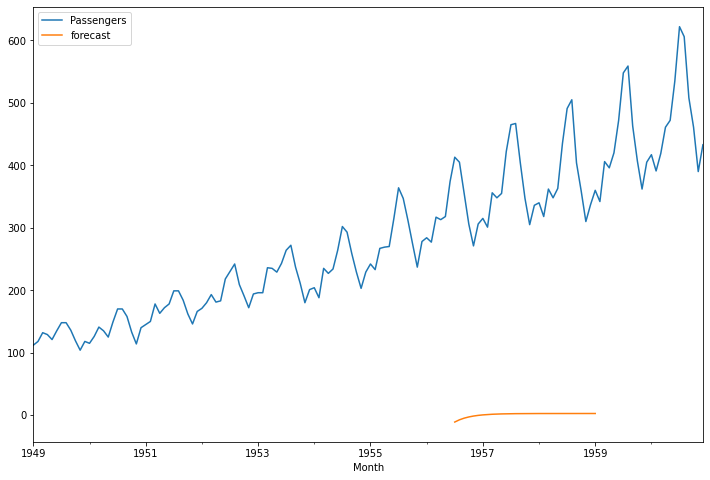

In [57]:
df['forecast']=model_fit.predict(start=90,end=120,dynamic=True)
df[['Passengers','forecast']].plot(figsize=(12,8))

In [51]:
model=sm.tsa.statespace.SARIMAX(df['Passengers'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\arkarmak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\arkarmak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Month'>

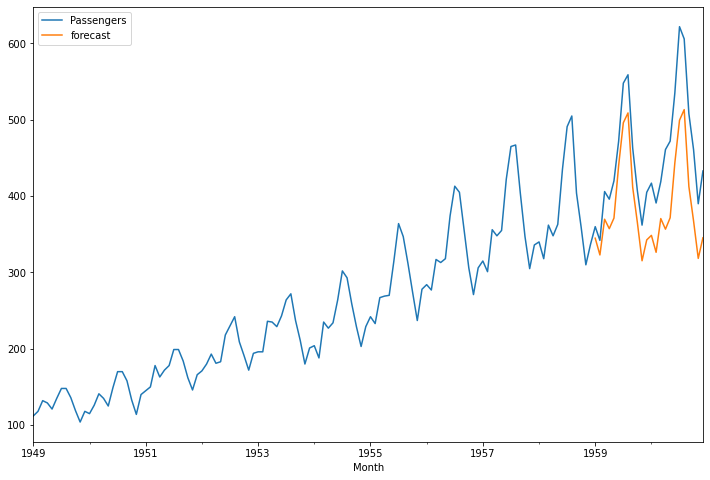

In [56]:
df['forecast']=results.predict(start=120,end=143,dynamic=True)
df[['Passengers','forecast']].plot(figsize=(12,8))

In [54]:
df.describe()

,Passengers,Passengers First Difference,Seasonal First Difference,forecast
count,144.000000,143.000000,132.000000,14.000000
mean,280.305556,2.244755,31.780303,381.813939
std,119.975188,33.762680,17.652850,52.523417
min,104.000000,-101.000000,-8.000000,295.564698
25%,180.000000,-16.000000,21.000000,339.307166
50%,265.500000,4.000000,30.000000,377.545028
75%,360.500000,22.500000,45.250000,416.112741
max,622.000000,87.000000,74.000000,478.552584
